<a href="https://colab.research.google.com/github/Shkum/IT_STEP/blob/ML/module3/DZ_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [278]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds.csv", index_col='Unnamed: 0')

In [279]:
df.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


# Завдання 1
Очистіть дані від викидів, виведіть основні числові характеристики та намалюйте точкову діаграму

<Axes: >

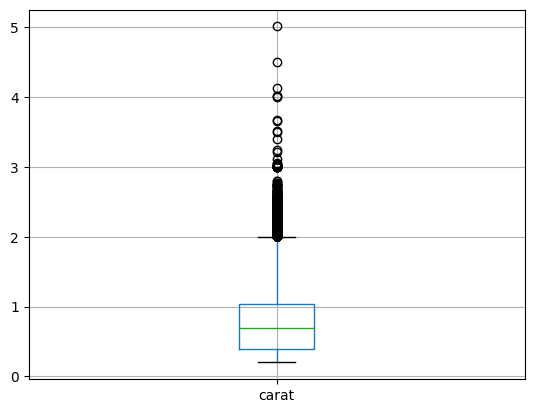

In [280]:
df.boxplot(column='carat')

<Axes: >

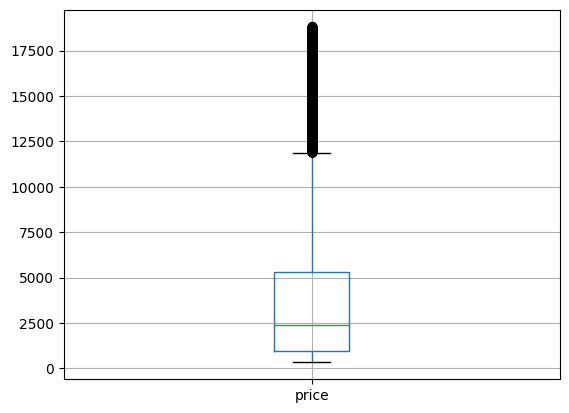

In [281]:
df.boxplot(column='price')

In [282]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

In [283]:
df1 = df.copy()

for column_name in df1.columns:
  if df1.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  df1 = remove_outliers(df1, column_name)

print(df1.shape)
print()
print(df.shape)

(49516, 2)

(53940, 2)


<Axes: >

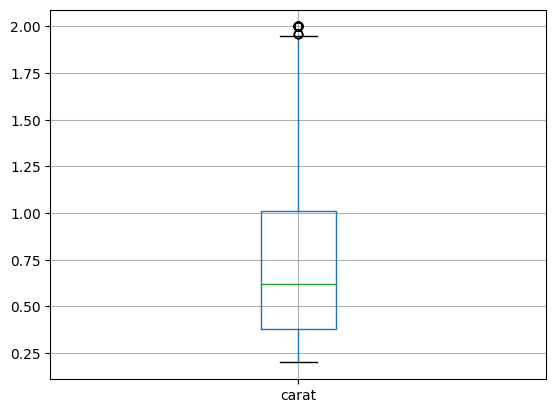

In [284]:
df1.boxplot(column='carat')

<Axes: >

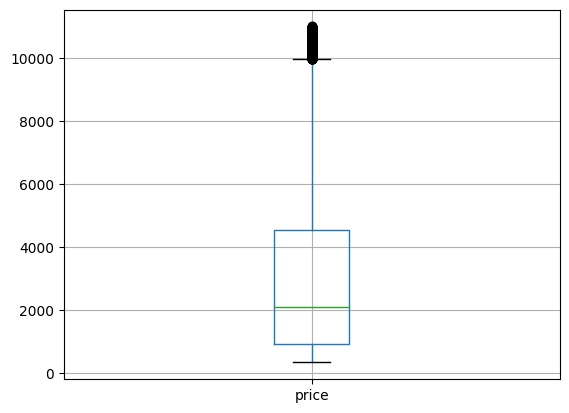

In [285]:
df1.boxplot(column='price')

In [286]:
df1.describe()

,carat,price
count,49516.000000,49516.000000
mean,0.707094,3019.606087
std,0.362928,2576.559708
min,0.200000,326.000000
25%,0.380000,900.000000
50%,0.620000,2084.000000
75%,1.010000,4523.000000
max,2.000000,11003.000000


<Axes: xlabel='carat', ylabel='price'>

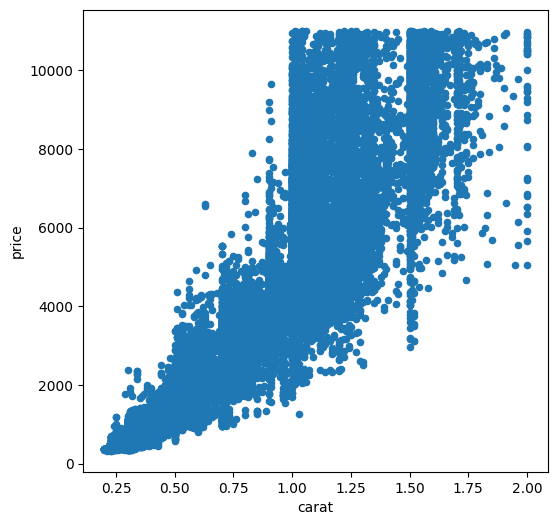

In [287]:
df1.plot(kind='scatter', x='carat', y='price', figsize=(6,6))

# Завдання 2
Розділіть дані на залежну y та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [288]:
y = df1["price"]
X = df1.drop(columns=['price'])

In [289]:
X.shape

(49516, 1)

In [290]:
y.shape

(49516,)

In [291]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Завдання 3
Натренуйте модель та виведіть такі метрики: MAE, RMSE, R2

In [292]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [293]:
model.fit(X_train, y_train)


LinearRegression()

In [294]:
y_pred = model.predict(X_test)

In [295]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df2 = pd.DataFrame()

  df2.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df2.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df2.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df2.round(2)

In [296]:
all_metrics = pd.DataFrame()

In [297]:
all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)
all_metrics["mean"] = get_metrics(y_test, np.full_like(y_test, y_test.mean()), "mean")

In [298]:
a = all_metrics
a

,train,test,mean
MAE,655.31,664.91,2115.91
RMSE,1003.80,1014.02,2586.33
R2,0.85,0.85,-0.00


# Завдання 4
Напишіть рівняння регресії за прикладом:
Бал_літній = 1.02*Бал_зимовий -15.6

In [299]:
coefficients1 = model.coef_.round(3)
coefficients1

array([6533.401])

In [300]:
intercept1 = model.intercept_.round(3)
intercept1

-1599.33

# y = 6533.401 * carat + (-1599.33)

# Завдання 5 (оптимально)
Додайте в таблицю новий стовпчик carat**2. Знову натренуйте модель та напишіть рівняння регресії. Порівняйте дві моделі за метриками

In [301]:
df1['carat ** 2'] = df['carat'] ** 2
df1.head(3)

,carat,price,carat ** 2
0,0.23,326,0.0529
1,0.21,326,0.0441
2,0.23,327,0.0529


In [302]:
y = df1["price"]
X = df1.drop(columns=['price'])
X.shape

(49516, 2)

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [304]:
model.fit(X_train, y_train)

LinearRegression()

In [305]:
y_pred = model.predict(X_test)

In [306]:
all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)
all_metrics["mean"] = get_metrics(y_test, np.full_like(y_test, y_test.mean()), "mean")

In [307]:
b = all_metrics
b

,train,test,mean
MAE,626.48,637.00,2115.91
RMSE,998.50,1008.17,2586.33
R2,0.85,0.85,-0.00


In [308]:
coefficients2 = model.coef_.round(3)
coefficients2

array([5307.674,  741.577])

In [309]:
intercept2 = model.intercept_.round(3)
intercept2

-1201.105

# y = 5307.674 * "carat" + 741.577 * "carat ** 2" + (-1201.105)

___________________________________________________________

In [310]:
X = df1['carat'] ** 2
X.shape

(49516,)

In [311]:
X = X.values.reshape(-1, 1)
X.shape

(49516, 1)

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [313]:
model.fit(X_train, y_train)

LinearRegression()

In [314]:
y_pred = model.predict(X_test)

In [315]:
all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)
all_metrics["mean"] = get_metrics(y_test, np.full_like(y_test, y_test.mean()), "mean")

In [316]:
c = all_metrics
c

,train,test,mean
MAE,661.82,668.53,2115.91
RMSE,1089.03,1096.72,2586.33
R2,0.82,0.82,-0.00


In [317]:
coefficients3 = model.coef_.round(3)
coefficients3

array([3789.102])

In [318]:
intercept3 = model.intercept_.round(3)
intercept3

626.547

# y = 3789.102 * "carat ** 2" + 626.547

___________________________________________________________

In [319]:
print(a, b, c, sep='\n' * 3)

        train     test     mean
MAE    661.82   668.53  2115.91
RMSE  1089.03  1096.72  2586.33
R2       0.82     0.82    -0.00


        train     test     mean
MAE    661.82   668.53  2115.91
RMSE  1089.03  1096.72  2586.33
R2       0.82     0.82    -0.00


        train     test     mean
MAE    661.82   668.53  2115.91
RMSE  1089.03  1096.72  2586.33
R2       0.82     0.82    -0.00


In [322]:
print(  ['Only Norm carat:', coefficients1, intercept1] ,
        ['Norm carat + Squared crat:',coefficients2, intercept2] ,
        ['Only Squared crat:', coefficients3, intercept3] , sep='\n' * 3)

['Only Norm carat:', array([6533.401]), -1599.33]


['Norm carat + Squared crat:', array([5307.674,  741.577]), -1201.105]


['Only Squared crat:', array([3789.102]), 626.547]


# КАК И НА ВИДЕО, ЛУЧШЕ ВСЕГО БУДЕТ РАБОТАТЬ МОЕЛЬ С КВАДРАТОМ КАРАТА. В ЭТОМ СЛУЧАЕТ ЗА МАЛЮСЕНЬКИЙ БРИЛИАНТ НАМ НЕ БУДУТ ДОПЛАЧИВАТЬ ЗА ТО ЧТО МЫ ВОЗМЁМ ЕГО, ТАК КАК КОЭФФИЦИЕНТ ПОЛОЖИТЕЛЬНЫЙ ТОЛЬКО В ЭТОМ СЛУЧАЕ. В ОСТАЛЬНЫХ СЛУЧАЯХ КОЭФФИЦИЕНТ ОТРИЦАТЕЛЬНЫЙ И ЕСЛИ МЫ ВОЗМЁМ МАЛЮСЕНЬКИЙ БРЮЛИК ИЛИ ВООБЩЕ НЕ ВОЗМЁМ БРЮЛИК, ТО НАМ ЕЩЕ ДОПЛАТЯТ